In [1]:
import pandas as pd

df = pd.read_csv("../data/raw_analyst_ratings.csv")
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB


📐 2. Descriptive Statistics

🔸 Headline Length

In [2]:
df["headline_length"] = df["headline"].astype(str).apply(len)
df["headline_length"].describe()


count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64

🔸 Count Articles per Publisher

<Axes: title={'center': 'Top 10 Publishers by Article Count'}, xlabel='publisher'>

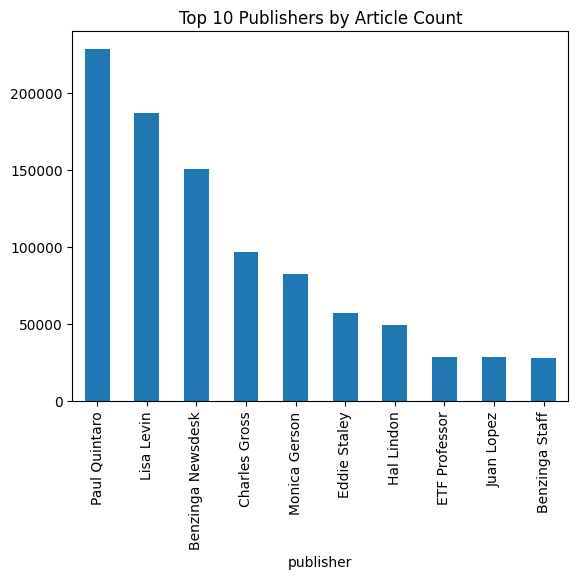

In [3]:
publisher_counts = df["publisher"].value_counts()
publisher_counts
top_publishers = publisher_counts.head(10)
top_publishers.plot(kind="bar", title="Top 10 Publishers by Article Count")

🔸 Publication Date Trends 

C:\Users\PC\AppData\Local\Temp\ipykernel_27300\284754036.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['published_at'] = pd.to_datetime(df[date_col], errors='coerce', utc=True)


<Axes: title={'center': 'Articles per Day'}, xlabel='date'>

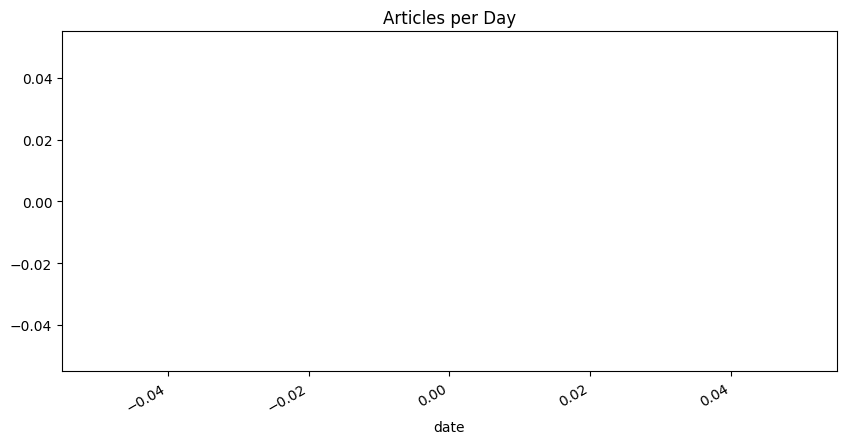

In [5]:
# Robustly detect a date/time column and parse it
date_col = None
for c in df.columns:
    if 'publish' in c.lower() or 'date' in c.lower():
        date_col = c
        break
# If no obvious column found, try common names explicitly
if date_col is None:
    for candidate in ['published', 'published_at', 'publishedAt', 'publishedDate', 'published_date', 'date', 'created_at']:
        if candidate in df.columns:
            date_col = candidate
            break
if date_col is None:
    raise KeyError('No date-like column found in dataframe. Columns: {}'.format(list(df.columns)))
# Parse the detected column into timezone-aware datetimes where possible
df['published_at'] = pd.to_datetime(df[date_col], errors='coerce', utc=True)
# Create a plain date column for grouping (handles NaT safely)
df['date'] = df['published_at'].dt.date
# Plot articles per day; drop NaT dates to avoid plotting issues
df.dropna(subset=['date']).groupby('date').size().plot(figsize=(10,5), title='Articles per Day')